In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scsavailability import functions as fn

In [4]:
path = 'C:/Users/chris.hughes/Documents/git/scs/data/'

In [6]:
av_raw = pd.read_csv(path+"Availability_for_ML.csv")
fa_nov = pd.read_csv(path+"SCS_Alerts_NOV.csv")
fa_oct = pd.read_csv(path+"SCS_Alerts_OCT.csv")

data = fn.pre_process_av_and_fa_oct_nov(av_raw,fa_oct,fa_nov,remove_same_location_faults = True)

fa = data['faults']
av = data['availability']

fa = fn.floor_time(fa,'Entry time') 

fa = fn.faults_aggregate_and_pivot(df=fa,
                                time_col='Entry time',
                                fault_level='fault ID type',
                                agg_col='Duration',
                                agg_type='sum',#can use mean/count/sum
                                quadrant=None) # by default all quadrants are kept

av = fn.availability_quadrant_mean(df=av,
                                time_col='Datetime') # by default all quadrants are kept

df = fn.merge_av_fa(av_df=av,
                 fa_df=fa,
                 min_date=None, 
                 max_date=None) #specify min/max date if you want to filter data by date


#remove columns with only zeros (faults that did not happen in this period of time or quadrant)
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

Quadrants Assigned
Modules Assigned
duplicated location faults removed - max duration kept
Fault and availability data pre-processed
Time shifted by 0m
Faults aggregated and pivoted
Availability data aggregated
Availability and fault datasets merged


,Datetime,Downtime,0,3000,3104,3107,3114,3211,3222,3415,...,11656,11816,11822,11823,11824,11848,12008,12014,12015,12016
0,2020-10-16 06:00:00,0.370236,331,0,347,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-10-16 07:00:00,0.327088,466,0,1700,0.0,0,0.0,0,0,...,4,0,30,0,0,0,0,80,0,0
2,2020-10-16 08:00:00,0.234701,167,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-10-16 09:00:00,0.168205,671,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-16 10:00:00,0.231875,276,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,7,0,0,63,0


Feature Importance Ranking: 
 
    Importance Feature
0    0.209160    5105
1    0.078636    5329
2    0.070322    3429
3    0.051510    3416
4    0.045731    5416
5    0.045204    5120
6    0.043416    3419
7    0.038384    3504
8    0.030891    5100
9    0.030146    3428

Number of Selected Features:30

Regression Metrics: 
 
              D_Tree         RF  RF Reduced
MAE        0.135981   0.107221    0.099450
MSE       0.0290131   0.018076    0.014829
RMSE       0.170332   0.134447    0.121775
MAPE%         43.53  35.530000   30.800000
ACC%          56.47  64.470000   69.200000
OOB             N/A   0.287158    0.251482
R2_Train          1   0.902535    0.897019
R2_Pred   -0.260131   0.214908    0.349354


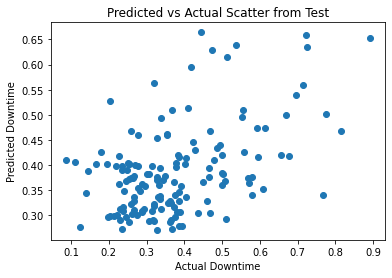

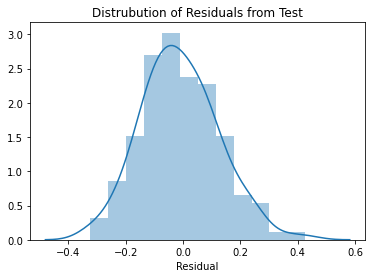

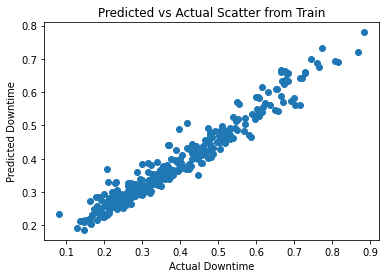

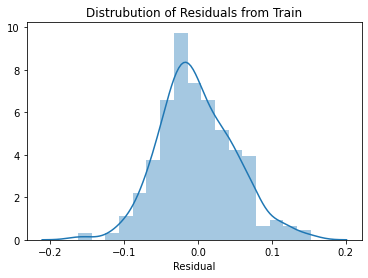

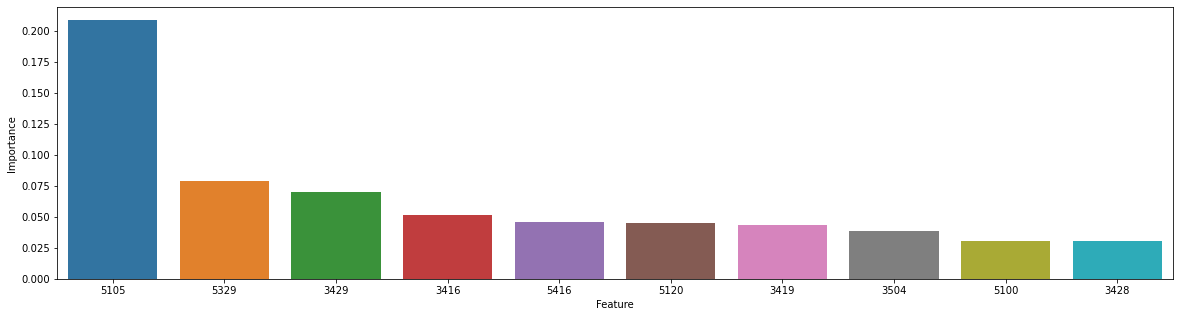

In [8]:
#df = df.reset_index()
fn.run_model(df,num_trees=100,visualise=False)